# 实验3  神经网络

### 一、实验目的

掌握多层感知器（多层前馈神经网络）和反向传播算法的原理与应用，熟悉Scikit-learn中神经网络模型的使用。  

### 二、实验内容

####  1.Scikit-learn中神经网络模型类库介绍

#### （1）MLPClassifier 类

MLPClassifier 类实现了通过 Backpropagation 进行训练的多层感知器（MLP）算法，最小化交叉熵损失函数（包含正则项）：

$$Loss\left(\hat{y},y,W\right) = -y \ln {\hat{y}} - (1-y) \ln{(1-\hat{y})} + \alpha ||W||_2^2$$

$$W^{i+1} = W^i - \epsilon \nabla {Loss}_{W}^{i}$$

函数说明：

class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

主要参数：

1）hidden_layer_sizes—隐层的神经元个数：元组，*i*th元素表示第*i*th隐层的神经元个数，设定网络结构。

2）activation—隐层单元激活函数类型：默认’relu’，取值有{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}。

3）solver—权重优化算法（求解器）：默认‘adam’，取值有{‘lbfgs’, ‘sgd’, ‘adam’}，‘sgd’随机梯度下降。

4）learning_rate_init—学习率：默认0.001，仅solver=’sgd’ or ‘adam’时有效。
  

#### （2） MLPRegressor 类
MLPRegressor 类实现了通过 Backpropagation 进行训练的多层感知器（MLP）算法，最小化均方误差损失函数（包含正则项）：

$$Loss\left(\hat{y},y,W\right)= \frac{1}{2}||\hat{y} - y ||_2^2 + \frac{\alpha}{2} ||W||_2^2$$

函数参数与MLPClassifier一致。

#### 2 逼近XOR函数的多层感知器

In [ ]:
from sklearn.neural_network import MLPClassifier

y = [0, 1, 1, 0]
X = [[0, 0], [0, 1], [1, 0], [1, 1]]

clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

predictions = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i, p in enumerate(predictions):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 0.5
True: 0, Predicted: 0
True: 1, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 1


* 观察学习到的网络权重

In [ ]:
print('Weights connecting the input layer and the hidden layer: \n%s' % clf.coefs_[0])
print('Hidden layer bias weights: \n%s' % clf.intercepts_[0])
print('Weights connecting the hidden layer and the output layer: \n%s' % clf.coefs_[1])
print('Output layer bias weight: \n%s' % clf.intercepts_[1])

Weights connecting the input layer and the hidden layer: 
[[ 4.62307305  4.35091497]
 [-9.96534818  9.89742595]]
Hidden layer bias weights: 
[-3.02424358 -1.50081527]
Weights connecting the hidden layer and the output layer: 
[[8.57287754]
 [8.77109104]]
Output layer bias weight: 
[-8.77102007]


#### 3 MNIST手写数字分类

参考Scikit-learn手册中MLPClassifier的例程：MNIST网络权重可视化（https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py），
补充修改程序，实现对网络权重的可视化和测试数字图片的识别。

Data Set Characteristics:

MNIST数据集是机器学习领域中非常经典的一个数据集，由70000个手写数字样本组成，每个样本都是一张28 * 28像素的灰度手写数字图片，但不是以图片格式存储的。

![](https://ai-studio-static-online.cdn.bcebos.com/bc059f1fcd6b44d88472cbafacaa3f4d4ee6e7f230a6467986b060efa5fa4d4c)


In [5]:
#Load  data from https://www.openml.org/d/554
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from PIL import Image
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)



In [6]:
#Load  data from local Dataset
import csv
import pandas as pd
import numpy as np

data=pd.read_csv('data/data16415/mnist_784.csv')
X=np.array(data.iloc[:,:784])
y=np.array(data.loc[:,'class'])
print(X.shape)

(70000, 784)


In [7]:
# split train/test 划分数据集 
from sklearn.model_selection import train_test_split
X = X / 255.
#请补充
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 5) 


In [ ]:
# define and train network 定义并训练网络mlp

#请补充
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(50,), max_iter=100, random_state=20)
mlp.fit(X, y)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

In [3]:
#定义载入图像的函数
def load_image(file):
    im = Image.open(file).convert('L')                        #将RGB转化为灰度图像，L代表灰度图像，像素值在0~255之间
    im = im.resize((28, 28), Image.ANTIALIAS)                 #resize image with high-quality 图像大小为28*28
    #im = np.array(im).reshape(1, 1, 28, 28).astype(np.float32)#返回新形状的数组,把它变成一个 numpy 数组以匹配数据馈送格式。
    # print(im)
    im = im / 255.0 * 2.0 - 1.0                               #归一化到【-1~1】之间
    return im


In [4]:
#读入测试图片并识别
from PIL import Image

infer_path='6aafea210d92833_l.pnd.jpg'
#img = load_image(infer_path)
img = Image.open(infer_path).convert('L') 
img = img.resize((28, 28), Image.ANTIALIAS) 
#img = np.array(img).astype(np.float32)
#img = img / 255.0 * 2.0 - 1.0 
plt.imshow(img)   #根据数组绘制图像
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("该图片的预测结果的label为: %d" % y_predict[0])

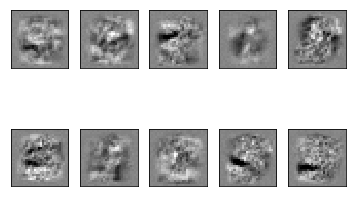

In [ ]:
# 网络权重可视化
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

* 对于手写数字识别的指标除了精度（score）外，还可以采用混淆矩阵



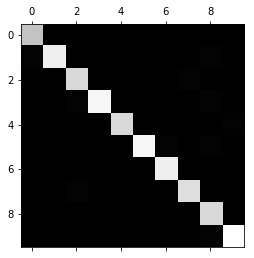

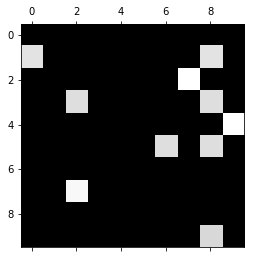

In [16]:
from sklearn.metrics import confusion_matrix

y_test_pred = mlp.predict(X_test)
conf_mx = confusion_matrix(y_test,y_test_pred)#把第i个预测为第j个的个数
#对角线上数字越大结果越好
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1,keepdims=True)
np.fill_diagonal(conf_mx,0)#把所有对角线的项全赋值为0！
norm_cm=conf_mx/(row_sums+0.1)#把每一项化得极小这样可以在图形里面显现出来
plt.matshow(norm_cm,cmap=plt.cm.gray)
plt.show()


	第一张图是混淆矩阵，看着很精确。第二张图可以说是“误差放大矩阵，把误差放大投出来

#### 4  神经网络回归（选做）
设计学习一个多层感知器拟合正弦曲线

0.9514855679452561


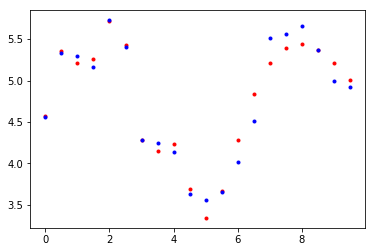

In [57]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
X=np.arange(0,10,0.5)
y = 4 + np.sin(X) + np.random.rand(len(X))
mlp = MLPRegressor(solver='lbfgs',activation='tanh',hidden_layer_sizes=(50,),max_iter=200,random_state=20)
mlp.fit(X.reshape(-1,1), y)
print(mlp.score(X.reshape(-1,1), y)) 
Xnew = X.reshape(-1,1)
y_predict = mlp.predict(X.reshape(-1,1))

plt.plot(Xnew,y_predict,"r.")
plt.plot(X,y,"b.")


In [55]:
Xnew

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

#### 实验与讨论
* 选择MLPClassifier函数的参数值，比较分类性能并分析总结（至少选取三个参数分别比较，如网络结构、迭代次数、正则项系数、早停等）。

例如：hidden_layer_sizes参数分别取(10,)、(20,)、(50,)、(100,)，比较训练集和测试集的分类精度。

* 选取一张手写数字图像，添加到文件夹data，进行识别预测。

### 三、实验结果与分析

	对于问题一，我选择观察MLP分类器的隐藏神经元个数、最大迭代次数、以及惩罚项大小对结果产生的影响。其中激活函数使用的是sigmoid压缩函数，而算法选择的是准牛顿方法

In [13]:
#问题一
from sklearn.neural_network import MLPClassifier
#import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#划分样例
data=pd.read_csv('data/data16415/mnist_784.csv')
X=np.array(data.iloc[:,:784])
y=np.array(data.loc[:,'class'])
X = X / 255.#将数据压缩在0~1的范围内
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 5)

mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=200, random_state=20)
mlp.fit(X_train, y_train)
print("when the number of hidden layer = 2")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
#hidden layer = 10
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,), max_iter=200, random_state=20)
mlp.fit(X_train, y_train)
print("when the number of hidden layer = 10")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
#hidden layer = 50
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(50,), max_iter=200, random_state=20)
mlp.fit(X_train, y_train)
print("when the number of hidden layer = 50")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

when the number of hidden layer = 2
Training set score: 0.680302
Test set score: 0.676143
when the number of hidden layer = 10
Training set score: 0.956111
Test set score: 0.932286
when the number of hidden layer = 50
Training set score: 0.999333
Test set score: 0.964429


	第一个选取的参数是隐藏神经元的个数，分别取的2、10与50，最后计算得出结果是，2的时候拟合最糟糕。这个很好理解，因为数据是多维的，关系也是一个复杂非线性关系，用两个神经元来拟合显然不妥。当隐藏神经元个数达到10的时候拟合效果已经比较好，评分超过了0.9，当达到50的时候效果更佳，但为了节约接下来程序运行的时间，接下来取10的时候进行运算。

In [17]:
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,), max_iter=50, random_state=20)
mlp.fit(X_train, y_train)
print("when the max iteration time = 50")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,), max_iter=100, random_state=20)
mlp.fit(X_train, y_train)
print("when the max iteration time = 100")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,), max_iter=200, random_state=20)
mlp.fit(X_train, y_train)
print("when the max iteration time = 200")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

when the max iteration time = 50
Training set score: 0.924127
Test set score: 0.922286
when the max iteration time = 100
Training set score: 0.943825
Test set score: 0.928857
when the max iteration time = 200
Training set score: 0.956111
Test set score: 0.932286


	第二个选取的参数是最大迭代次数，显然，迭代次数越多结果会越精准，但是当隐藏神经元比较多的时候，显然会增大计算量。本次实验选取了最大迭代次数分别为50、100与200的情况，结果表明迭代次数越多结果越有改善。但仍然是为了节省实验时间，最后我们选取了最大迭代次数为100的情形

In [18]:
mlp = MLPClassifier(solver='lbfgs',  alpha = 0.0001, activation='logistic', hidden_layer_sizes=(10,), max_iter=100, random_state=20)
mlp.fit(X_train, y_train)
print("when the regularizer = 0.0001")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp = MLPClassifier(solver='lbfgs', alpha = 0.0005, activation='logistic', hidden_layer_sizes=(10,), max_iter=100, random_state=20)
mlp.fit(X_train, y_train)
print("when the regularizer = 0.0005")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp = MLPClassifier(solver='lbfgs', alpha = 0.001, activation='logistic', hidden_layer_sizes=(10,), max_iter=100, random_state=20)
mlp.fit(X_train, y_train)
print("when the regularizer = 0.001")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

when the regularizer = 0.0001
Training set score: 0.943825
Test set score: 0.928857
when the regularizer = 0.0005
Training set score: 0.944778
Test set score: 0.930286
when the regularizer = 0.001
Training set score: 0.945016
Test set score: 0.930429


	第三个选取的是惩罚项，惩罚项的作用是防止过拟合，在误差小到一定程度的时候就停止迭代。这一系数并不是越小越好也不是越大越好，完全取决于数据的情况，以及要求的泛化程度。这里分别选取了0.0001、0.0005、0.001.观察得到0.001时与样例匹配结果最好，0.0001时结果最差。但是正如惩罚项原理，惩罚项是为了防止过拟合，所以反而要取分数最小的那一个，所以惩罚项取0.0001.

	由于在第一个实验当中要进行9次程序运行，为了节约时间并没有选择最佳结果的参数，而第二个实验只需要训练以此学习器，所以使用上一个实验结果得出的三个结果最好的参数进行试验。隐藏神经元取50，最大迭代次数取200，惩罚项系数取0.0001，算法使用准牛顿法，而激活函数使用sigmoid函数。

In [55]:
from sklearn.neural_network import MLPClassifier
#import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

#训练学习器
data=pd.read_csv('data/data16415/mnist_784.csv')
X=np.array(data.iloc[:,:784])
y=np.array(data.loc[:,'class'])
X = X / 255.#将数据压缩在0~1的范围内
mlp = MLPClassifier(solver='lbfgs',alpha = 0.0001,activation='logistic',hidden_layer_sizes=(50,),max_iter=200,random_state=20)
mlp.fit(X, y)
print(mlp.score(X, y))

0.9994285714285714


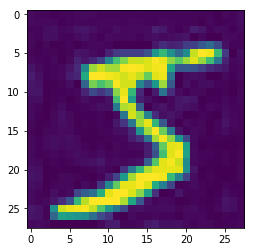

第一张图的预测结果的label为: 5


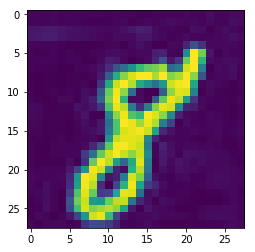

第二张图的预测结果的label为: 8
第三张图的预测结果的label为: 3


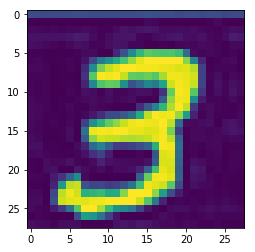

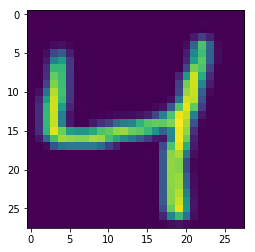

第三张图的预测结果的label为: 4


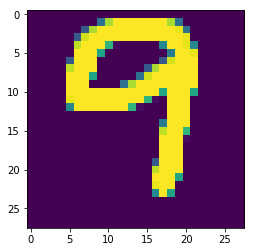

第三张图的预测结果的label为: 7


In [56]:
#draw and predic
def load_image(file):
    im = Image.open(file).convert('L')                        
    im = im.resize((28, 28), Image.ANTIALIAS)                
    im = np.array(im).reshape(28,28).astype(np.float32)#返回新形状的数组
    im = im / 255.0       
    #im = Image.fromarray(im)
    return im
infer_path='6aafea210d639583e0d023654fc92833.jpg'
img = load_image(infer_path)
plt.imshow(img)   
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("第一张图的预测结果的label为: %d" % y_predict[0])

infer_path='6aafea210d92833_l.pnd.jpg'
img = load_image(infer_path)
plt.imshow(img)   
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("第二张图的预测结果的label为: %d" % y_predict[0])

infer_path='6aafe.pnd.jpg'
img = load_image(infer_path)
plt.imshow(img)   
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("第三张图的预测结果的label为: %d" % y_predict[0])
infer_path='AM1H{_GKD(_~$FGVGI2O$)L.png'
img = load_image(infer_path)
plt.imshow(img)   
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("第四张图的预测结果的label为: %d" % y_predict[0])
infer_path='ima.png'
img = load_image(infer_path)
plt.imshow(img)   
plt.show()  
img = np.array(img).reshape(1,784)
y_predict = mlp.predict(img)
print("第五张图的预测结果的label为: %d" % y_predict[0])

	5个对了4个，结果良好。个人怀疑第五个数据的“9”是个“特例”。因为那个9明显看出来会亮一些.或者说这是因为书写习惯不同造成识别不出

	4 神经网络回归（选做）
	设计学习一个多层感知器拟合正弦曲线

0.9303583151709385


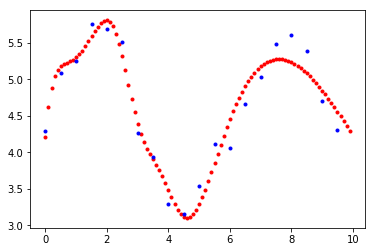

In [67]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
X=np.arange(0,10,0.5)
y = 4 + np.sin(X) + np.random.rand(len(X))
mlp = MLPRegressor(solver='lbfgs',activation='tanh',hidden_layer_sizes=(50,),max_iter=200,random_state=20)
mlp.fit(X.reshape(-1,1), y)
print(mlp.score(X.reshape(-1,1), y)) 
Xnew = np.arange(0,10,0.1).reshape(-1,1)
y_predict = mlp.predict(Xnew)

plt.plot(Xnew,y_predict,"r.")
plt.plot(X,y,"b.")


	蓝点为原数据点，红点测试点。结果良好。因为考虑到拟合的是正弦函数，图形为周期曲线，所以使用激活函数tanh效果应该略好一点。

（请给出实验内容中“实验与讨论”中的结果及其分析。）



